In [3]:
import numpy as np
import pandas as pd

The purpose of this project is to try to detect whether Breast Cancer is malignant (M) or benign (B). There are 10 real-valued metrics of the tumor. They are as follows: <br>
a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>

For each of these features, we are given the mean, standard error, and largest values to determine whether the Breast Cancer is malignant (M) or benign (B).

### Loading the Data from CSV into pandas dataframe


In [4]:
import os
DATA = './dataset'
def csv_load(file, directory=DATA):
    path = os.path.join(directory, file)
    return pd.read_csv(path)

raw_data = csv_load(file='data.csv')

In [5]:
# Now that the data is loaded, we can check out what it looks like
import matplotlib.pyplot as plt
raw_data.describe()


In /home/hunterythompson/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hunterythompson/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hunterythompson/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/hunterythompson/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hunterythompson/.local/lib/

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


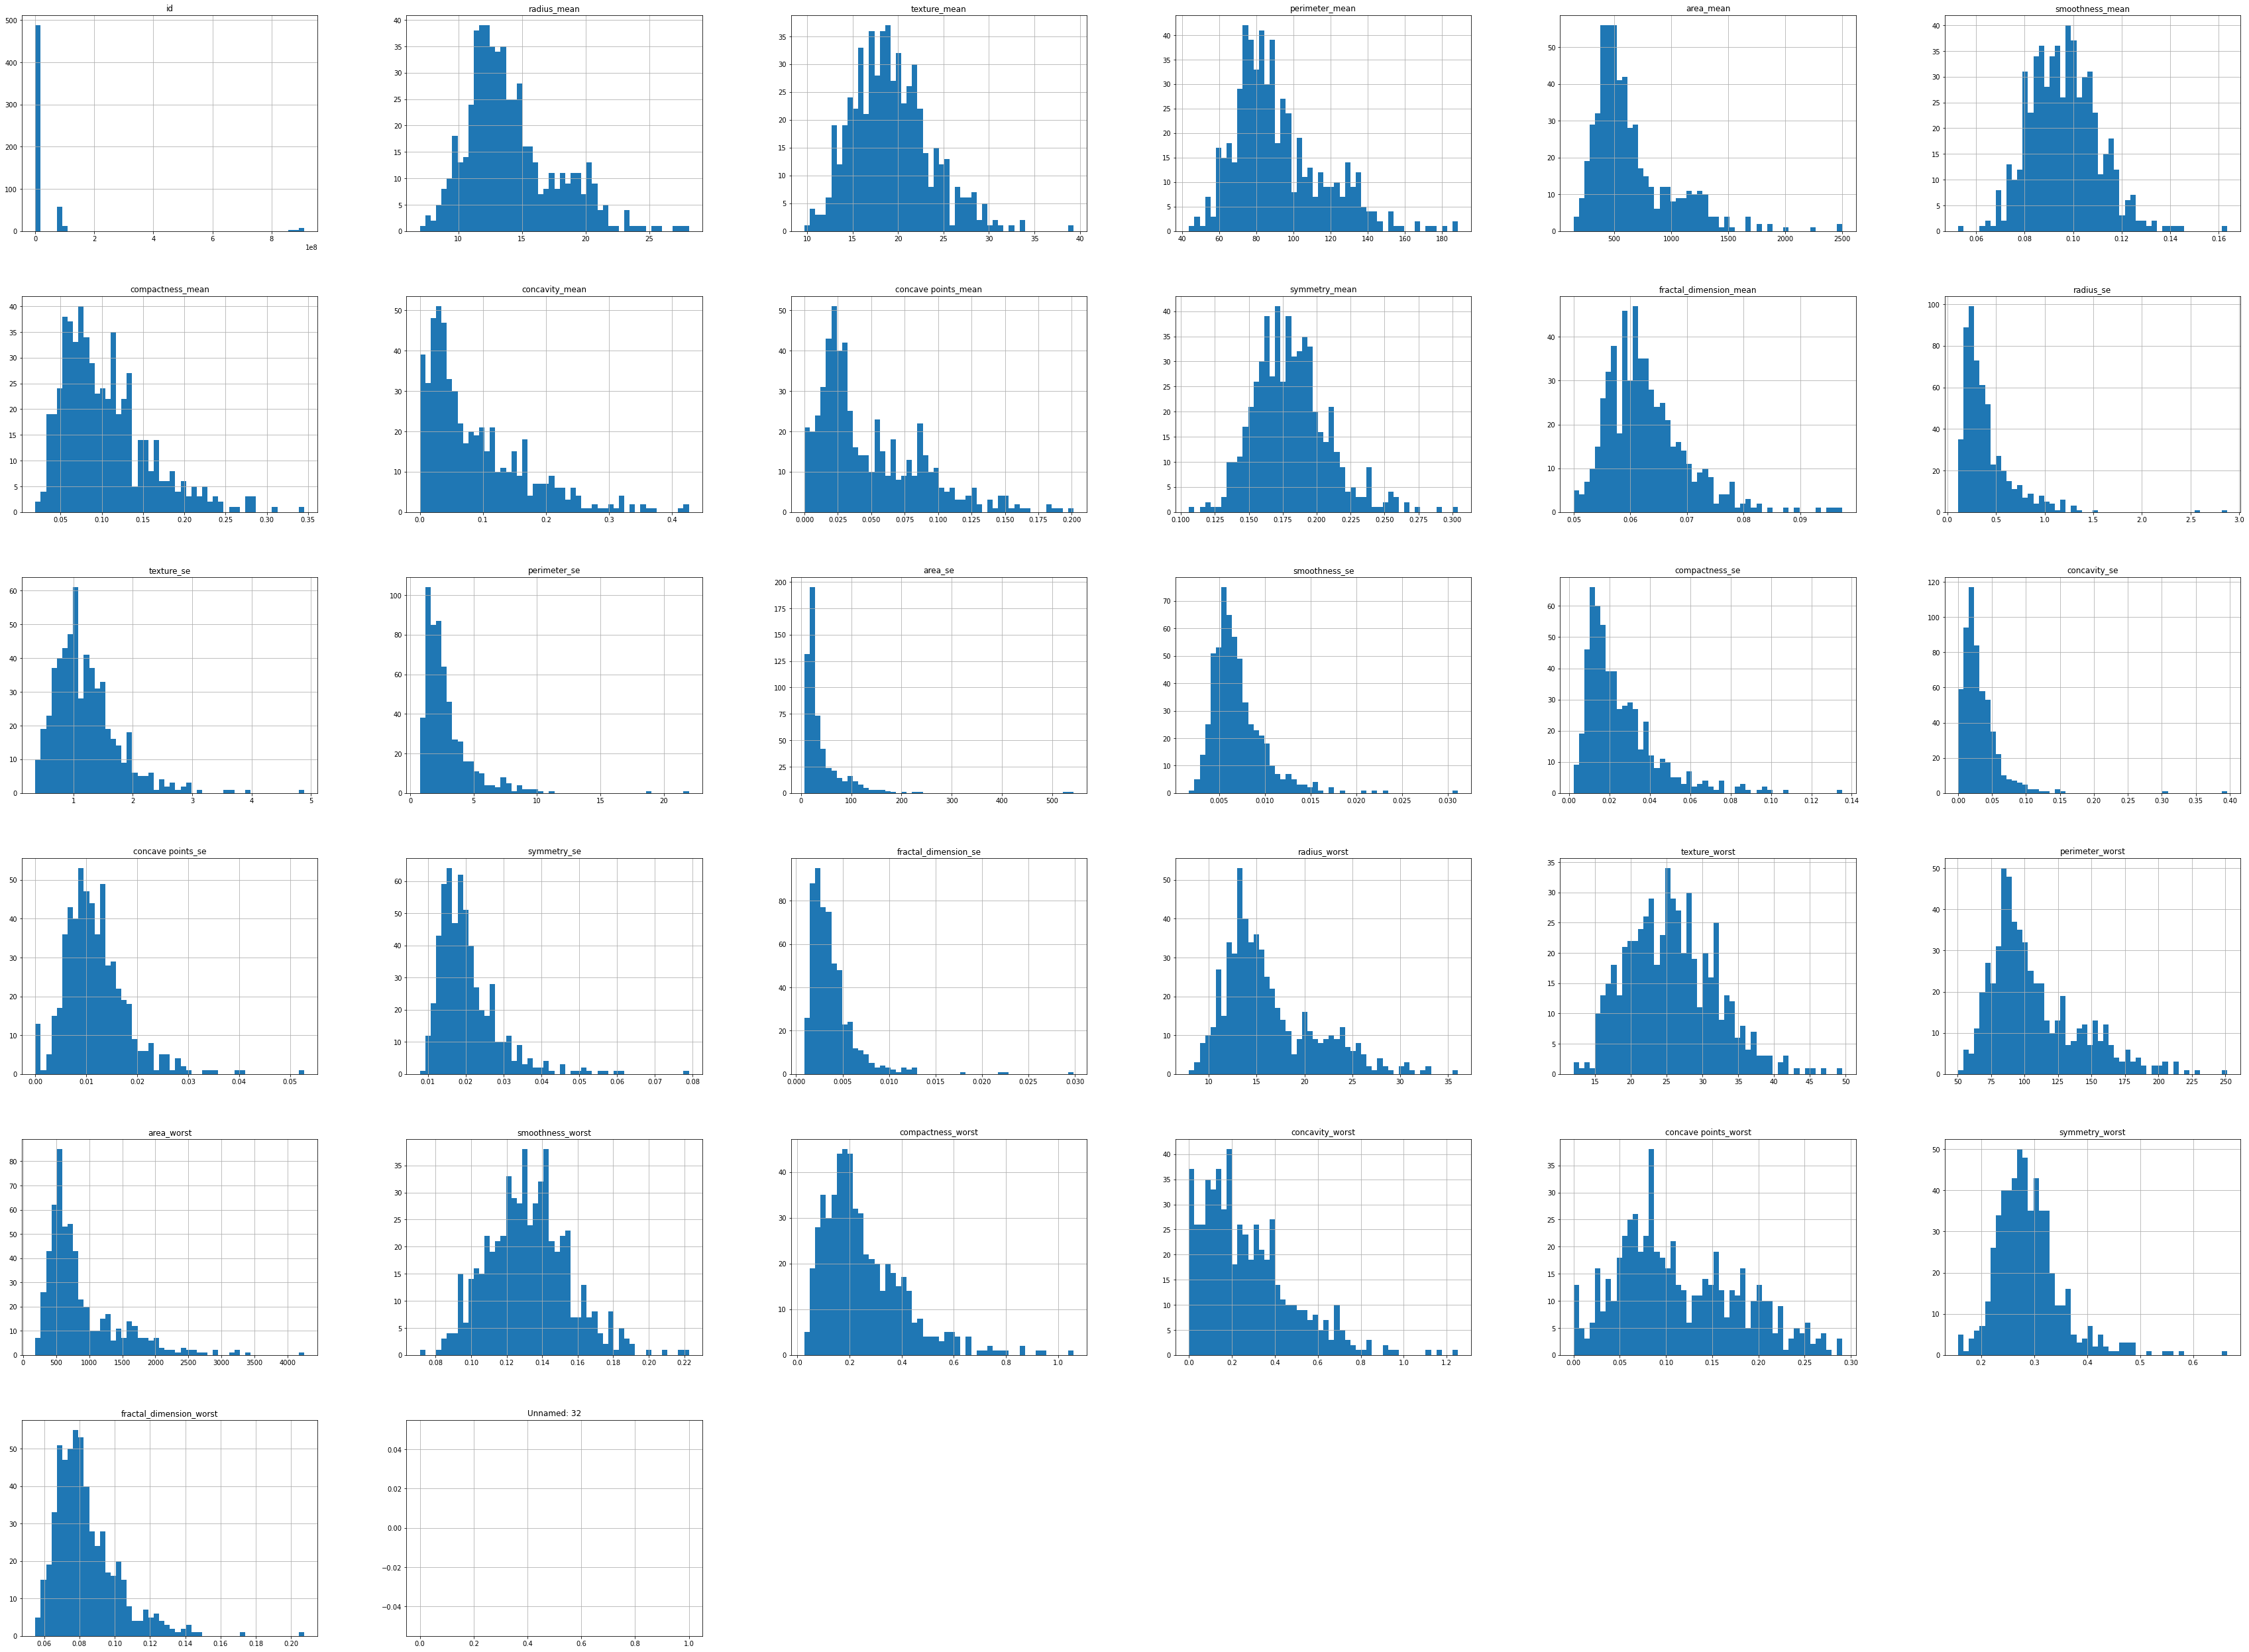

In [6]:
raw_data.hist(bins=50, figsize=(60,45))
plt.show()

An initial look at the data seems to show that many of the attributes skew right (as expected for data with a floor value of 0). The histograms also reveal outliers for many of the features. 

In [7]:
# Splitting the data into training/testing set
from sklearn.model_selection import StratifiedShuffleSplit

# Decided to use Stratified Shuffle Split to maintain ratio of M to B in both training and testing set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=17)
for train_ix, test_ix in splitter.split(raw_data, raw_data["diagnosis"]):
    train_set = raw_data.loc[train_ix]
    test_set = raw_data.loc[test_ix]

In [8]:
# Checking that Stratified Shuffle works
ts_rat = train_set['diagnosis'].value_counts() / len(train_set)
raw_rat = raw_data['diagnosis'].value_counts() / len(raw_data)

In [9]:
# The ratio of B to M is similar in both, which will hopefully improve the accuracy of our model on testing set
display(ts_rat)
display(raw_rat)

B    0.626374
M    0.373626
Name: diagnosis, dtype: float64

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

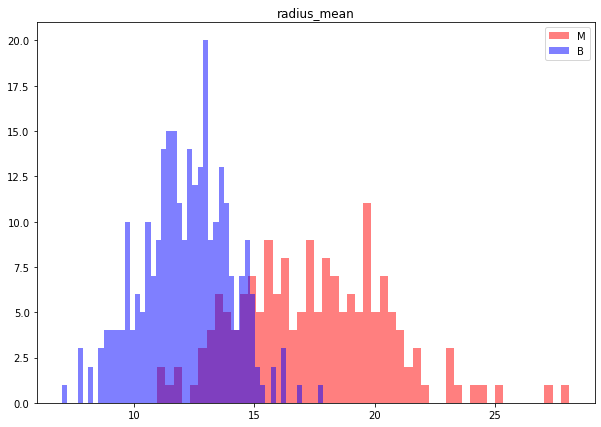

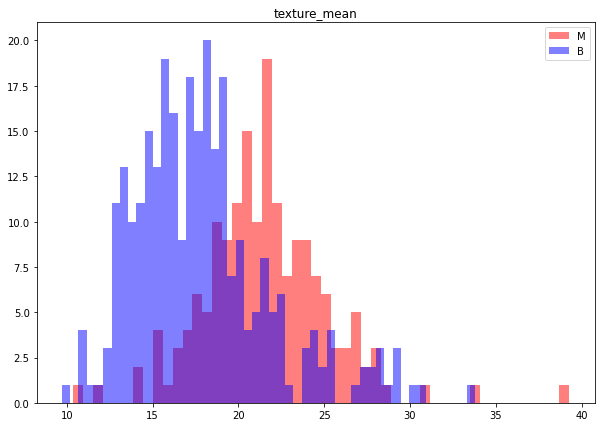

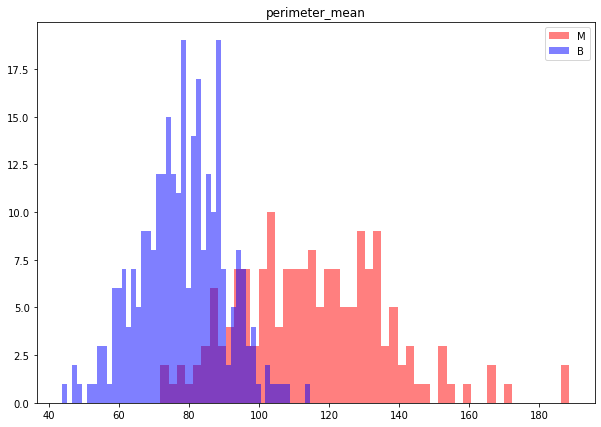

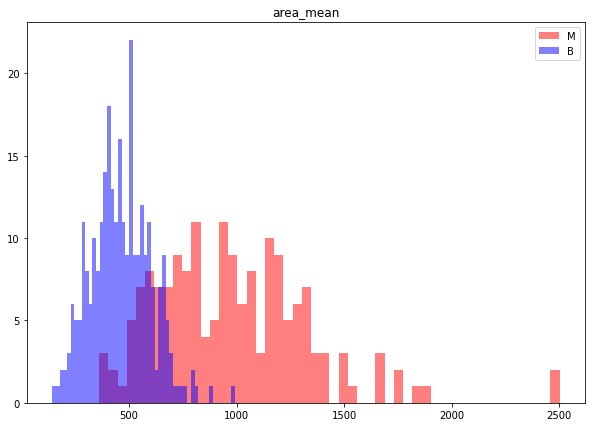

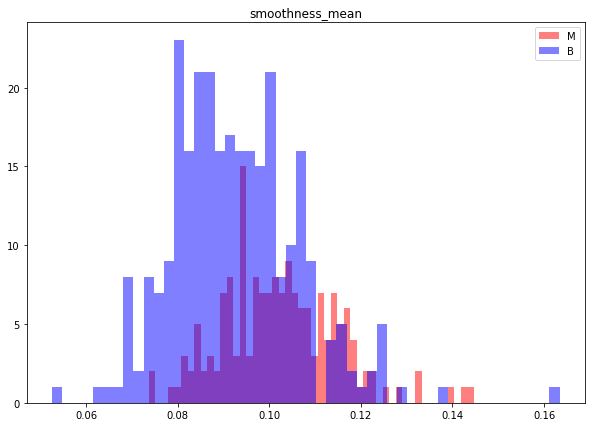

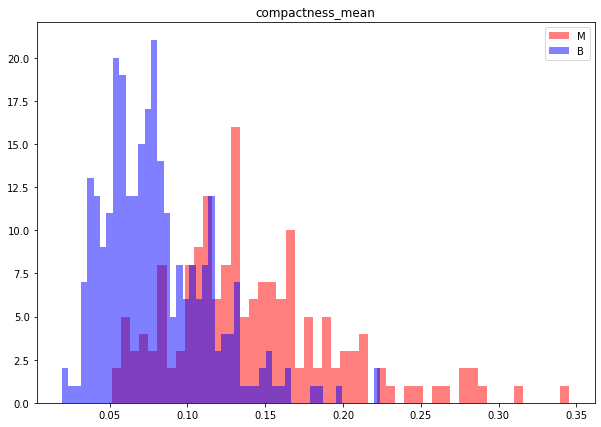

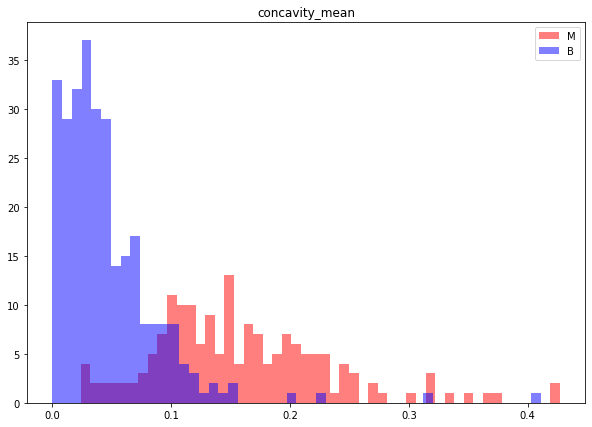

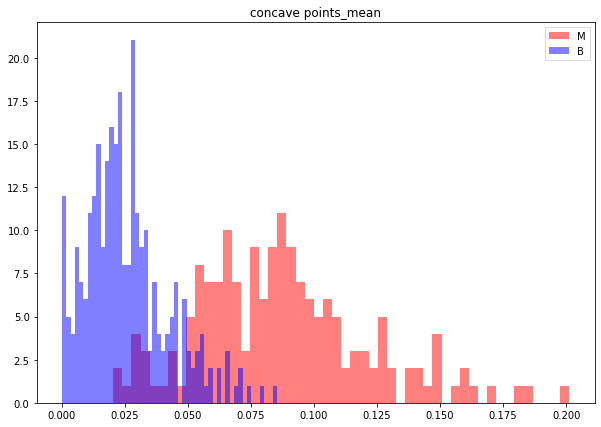

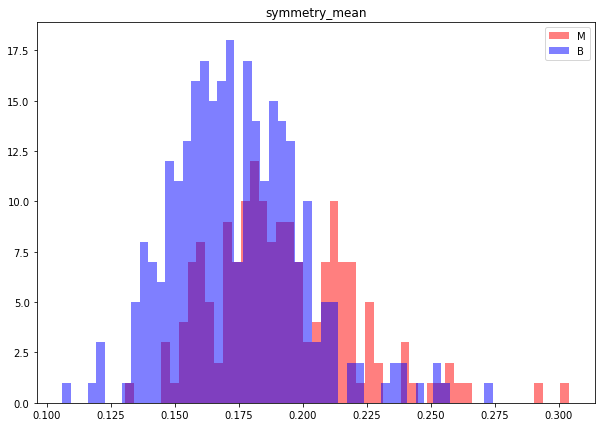

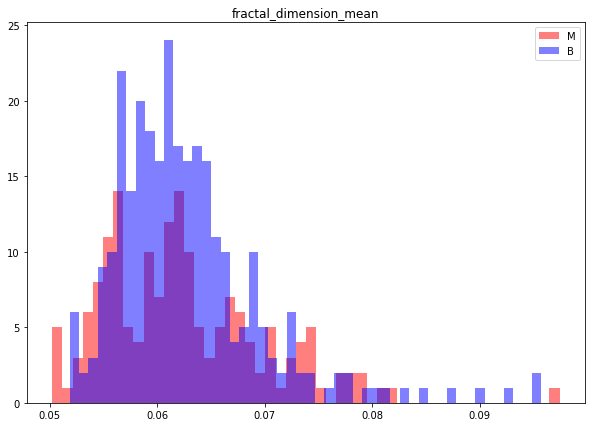

In [10]:
# Only looking at the mean values
cols = train_set.filter(like='mean')
cols = pd.concat([train_set['diagnosis'], cols], axis=1)



def separator(col):
    M = cols[cols['diagnosis'] == 'M'][col]
    B = cols[cols['diagnosis'] == 'B'][col]
    return M, B

for num, col in enumerate(cols.columns[1:]):
    plt.figure(figsize=(10,7))
    plt.hist(separator(col)[0], bins=50, alpha=0.5, label='M', color='r')
    plt.hist(separator(col)[1], bins=50, alpha=0.5, label='B', color='b')
    plt.legend(loc='upper right')
    plt.title(col)

plt.show()

Based on this primary look at the data, it seems tumor malignancy is correlated with some features. For example, higher mean radius seems to be correlated with higher rates of malignancy,

In [11]:
# check if there are any null values
train_set.isnull().sum()
# None of the values are null, so we don't have to clean the null values in dataset

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [53]:
# begin preprocessing data by removing certain columns and splitting to labels
train_label = train_set[['diagnosis']]
test_label = test_set[['diagnosis']]
training= train_set.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
testing= test_set.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
#pipeline to process training feature
# decided to use standard scaler to compensate for outliers
main_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

train_prepared = main_pipeline.fit_transform(training)
test_prepared = main_pipeline.fit_transform(testing)

In [55]:
#processing labels 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
labels_prepared = ordinal_encoder.fit_transform(train_label)
test_labels_prepared = ordinal_encoder.fit_transform(test_label)

In [16]:
# Training Logistic Regression encoder
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_prepared, labels_prepared.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.model_selection import cross_val_score
labels_prepared = labels_prepared.ravel()
test_labels_prepared = test_labels_prepared.ravel()

In [18]:
def display_scores(model, training, labels):
    # decided to use cross validation to check which model works best
    scores = cross_val_score(model, training, labels)
    print(scores)
    print("The average score is:", scores.mean())
    return scores
# scoring Logistic Regressor
log_reg_scores = display_scores(log_reg, train_prepared, labels_prepared)

[0.97802198 0.95604396 0.98901099 0.98901099 0.97802198]
The average score is: 0.9780219780219781


In [19]:
# Training Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
display_scores(rand_forest, train_prepared, labels_prepared)

[0.97802198 0.92307692 0.97802198 0.96703297 0.96703297]
The average score is: 0.9626373626373625


array([0.97802198, 0.92307692, 0.97802198, 0.96703297, 0.96703297])

In [20]:
# Training KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
display_scores(neigh, train_prepared, labels_prepared)

[0.97802198 0.93406593 0.97802198 0.95604396 0.96703297]
The average score is: 0.9626373626373625


array([0.97802198, 0.93406593, 0.97802198, 0.95604396, 0.96703297])

In [62]:
# Training Neural Net (MLP)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)
display_scores(mlp, train_prepared, labels_prepared)

[0.96703297 0.95604396 0.97802198 1.         0.98901099]
The average score is: 0.9780219780219781


array([0.96703297, 0.95604396, 0.97802198, 1.        , 0.98901099])

The two models that worked best were the neural network and the logistic regressor. Thus, we can try working with their hyperparameters to fine tune each of the models before running on our testing set.

In [63]:
# Using grid search to tune each of the models and figure out which works best
# Tuning LogReg
from sklearn.model_selection import GridSearchCV
log_reg_tune = LogisticRegression()
grid_params = [{'C': [0.1, 1, 10, 100], 'max_iter': [500]}]
grid_search_log = GridSearchCV(log_reg_tune, grid_params, cv=5, return_train_score=True, scoring = 'roc_auc')
grid_search_log.fit(train_prepared, labels_prepared)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [500]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [64]:
grid_search_log.best_params_
cvres_log = grid_search_log.cv_results_
for mean_score, params in zip(cvres_log['mean_test_score'], cvres_log['params']):
    print(mean_score, params)


0.9945304437564498 {'C': 0.1, 'max_iter': 500}
0.9944272445820432 {'C': 1, 'max_iter': 500}
0.9886480908152734 {'C': 10, 'max_iter': 500}
0.9834881320949433 {'C': 100, 'max_iter': 500}


In [65]:
# Tuning Neural Networks
nn_tune = MLPClassifier()
grid_params = [{'hidden_layer_sizes':[(100,), (200,), (100, 100,)], 'max_iter': [500]}]
grid_search = GridSearchCV(nn_tune, grid_params, cv=5, return_train_score=True, scoring='roc_auc')
grid_search.fit(train_prepared, labels_prepared)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [66]:
grid_search.best_params_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.9938080495356036 {'hidden_layer_sizes': (100,), 'max_iter': 500}
0.9921568627450981 {'hidden_layer_sizes': (200,), 'max_iter': 500}
0.9957688338493293 {'hidden_layer_sizes': (100, 100), 'max_iter': 500}


The neural network appears to preform best with more hidden layers. Thus, we have tuned and selected a model. We can train the model on all of the training data and test it on the testing set now!

In [89]:
#Training on entire train set
model_final = MLPClassifier(hidden_layer_sizes=(100, 100,), max_iter=500)
model_final.fit(train_prepared, labels_prepared)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [90]:
# finding final predictions & looking at model
from sklearn.metrics import roc_auc_score
final_pred = model_final.predict(test_prepared)
print(roc_auc_score(test_labels_prepared, final_pred))

0.9404761904761905
